<a href="https://colab.research.google.com/github/mahsaalebakhtiari/Pathrise/blob/main/Store_Sales_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Store Sales Analysis with Python**

This project analyzes retail sales data to extract meaningful insights using Python, Pandas, and Matplotlib.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving store_sales_sample_csv.csv to store_sales_sample_csv.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("store_sales_sample_csv.csv")
df.head()

,Order ID,Product,Category,Date,Quantity,Price,City
0,1001,Headphones,Accessories,2024-02-07,5,138.99,Salzburg
1,1002,Monitor,Tech,2024-05-29,2,60.17,Vienna
2,1003,Monitor,Tech,2024-02-03,4,60.05,Innsbruck
3,1004,Headphones,Accessories,2024-03-22,3,26.19,Graz
4,1005,Keyboard,Tech,2024-04-09,5,21.45,Innsbruck


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order ID  200 non-null    int64  
 1   Product   200 non-null    object 
 2   Category  200 non-null    object 
 3   Date      200 non-null    object 
 4   Quantity  200 non-null    int64  
 5   Price     200 non-null    float64
 6   City      200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [ ]:
df.isnull().sum()

,0
Order ID,0
Product,0
Category,0
Date,0
Quantity,0
Price,0
City,0


Data Cleaning

In this step, we clean and prepare the raw dataset to ensure it's ready for analysis.

- Convert the "Date" column from string to datetime format.
- Create a new "Revenue" column by multiplying quantity and price.
- Check for missing values and overall data structure.

This cleaning step helps prevent errors in analysis and ensures our visualizations are accurate.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Revenue'] = df['Quantity'] * df['Price']

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

In [ ]:
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales

,Revenue
Month,
2024-01,8183.29
2024-02,8034.90
2024-03,7534.22
2024-04,6116.02
2024-05,7328.56
2024-06,7099.02


In [ ]:
monthly_sales.index = monthly_sales.index.astype(str)

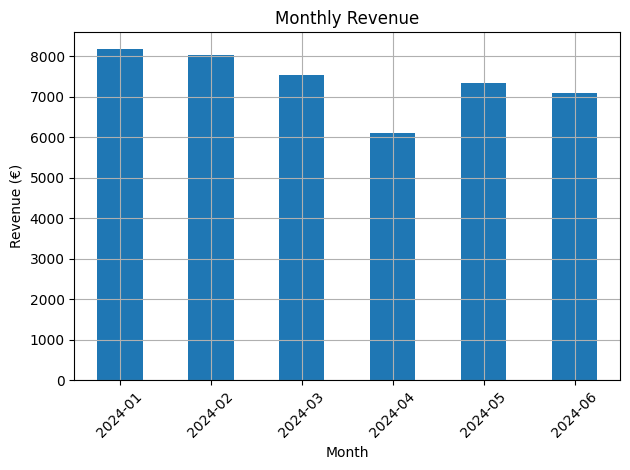

In [ ]:
import matplotlib.pyplot as plt
monthly_sales.plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly Revenue Visualization

This bar chart shows the total revenue for each month from January to June 2024.

We used Python's Pandas and Matplotlib libraries to:
- Group the sales data by month
- Calculate total revenue per month
- Visualize the trend of monthly income

This visualization helps us identify patterns in revenue flow and determine which months were more profitable. For example, January shows the highest revenue, which may indicate seasonal demand or a successful sales strategy during that period.

In [ ]:
city_sales = df.groupby('City')['Revenue'].sum()
print(city_sales)

City
Graz          7674.11
Innsbruck    10104.01
Linz          8130.19
Salzburg      9519.25
Vienna        8868.45
Name: Revenue, dtype: float64


In [ ]:
city_sales = city_sales.sort_values(ascending=False)

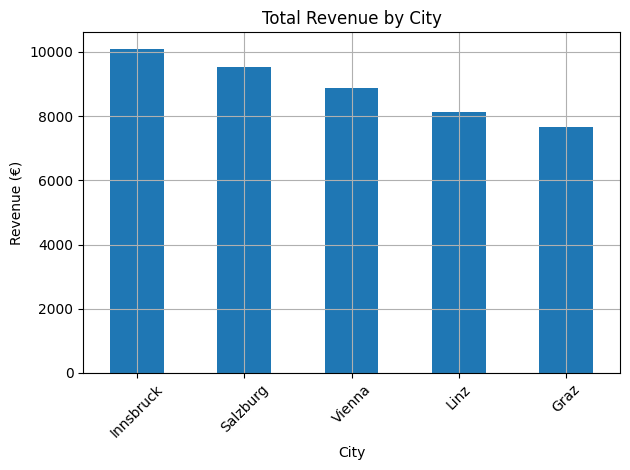

In [ ]:
city_sales.plot(kind='bar')
plt.title('Total Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue (€)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Total Revenue by City

This bar chart displays the total revenue generated in each city.

The data shows that Innsbruck had the highest revenue, followed by Salzburg and Vienna. Graz had the lowest revenue among the cities analyzed.

This type of visualization helps identify which locations are performing better in terms of sales and can guide future business strategies or marketing efforts.

In [ ]:
product_revenue = df.groupby('Product')['Revenue'].sum()
product_revenue

,Revenue
Product,
Headphones,10319.67
Keyboard,5576.50
Laptop,6614.41
Monitor,6731.14
Mouse,9374.71
USB Cable,5679.58


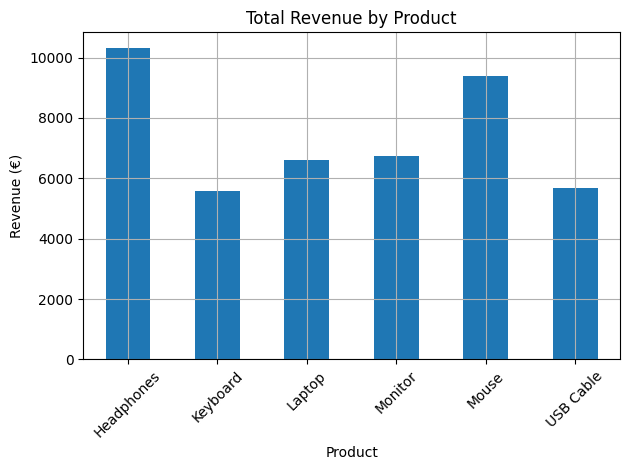

In [ ]:
product_revenue.plot(kind='bar')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue (€)')
plt.xticks(rotation= 45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Total Revenue by City

This bar chart displays the total revenue generated in each city.

The data shows that Innsbruck had the highest revenue, followed by Salzburg and Vienna. Graz had the lowest revenue among the cities analyzed.

This type of visualization helps identify which locations are performing better in terms of sales and can guide future business strategies or marketing efforts.

In [ ]:
product_quantity = df.groupby('Product')['Quantity'].sum()
product_quantity

,Quantity
Product,
Headphones,139
Keyboard,75
Laptop,97
Monitor,96
Mouse,119
USB Cable,83


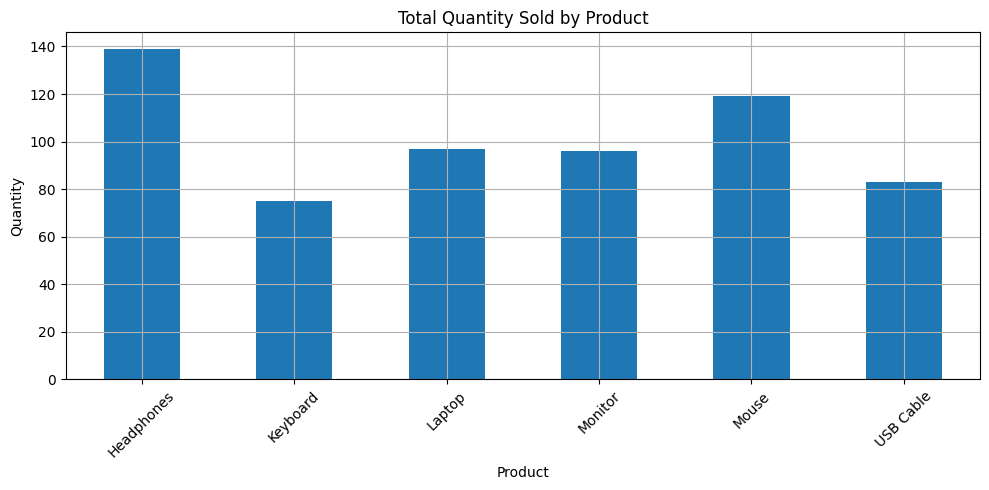

In [ ]:
product_quantity.plot(kind='bar' , figsize=(10,5))
plt.title('Total Quantity Sold by Product')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## Total Quantity Sold by Product

This bar chart shows the total number of units sold for each product.

Headphones had the highest quantity sold, followed by Mouse and Laptop. Keyboard and USB Cable were among the least sold products.

This analysis provides valuable insights into customer demand and can help businesses optimize their inventory and supply chain planning.

## Conclusion

Through this analysis, we gained valuable insights into the store's sales performance:

- Monthly Revenue Trends: Revenue was highest in January and February, then slightly declined in the following months.
- Top Performing Cities: Innsbruck and Salzburg generated the most revenue.
- Best-Selling Products: Headphones and USB Cables were the most profitable products.
- Customer Demand: Headphones had the highest quantity sold, indicating strong customer interest.

These insights can guide future business strategies, including targeted marketing, inventory management, and identifying high-demand products for promotion.